# Feature distributions from income classifier demo

You'll need to have setup the pipeline for the income classifier and done some requests.

## API Configuration

In [3]:
from seldon_deploy_sdk.rest import ApiException
from seldon_deploy_sdk import (
    MonitorApi,
    DeploymentFeatureData,
    Configuration,
    ApiClient,
)
from seldon_deploy_sdk.auth import OIDCAuthenticator

In [4]:
# For local testing use
INGRESS = "http://localhost:8080"

# For production usecase set this to your ingress
# for example if your SD URL is http://xxx.yyy.zzz.xyz/seldon-deploy/api/v1alpha1 set
# INGRESS = "http://xxx.yyy.zzz.xyz"

In [ ]:
config = Configuration()
config.host = f"{INGRESS}/seldon-deploy/api/v1alpha1"
config.verify_ssl = False

In [7]:
# auth if needed
config.oidc_server = f"{INGRESS}/auth/realms/deploy-realm"
config.oidc_client_id = "sd-api"
config.oidc_client_secret = "sd-api-secret"
config.auth_method = "client_credentials"

# Alternativey set instead of the "client_credentials" flow
# config.username = "admin@seldon.io"
# config.password = "12341234"
# config.auth_method = "password"

auth = OIDCAuthenticator(config)
config.id_token = auth.authenticate()

In [5]:
api_client = ApiClient(configuration=config, authenticator=auth)
api_instance = MonitorApi(api_client)

## Request feature distributions

In [6]:
deployment_name = "income-classifier"
deployment_namespace = "seldon"
feature_data = DeploymentFeatureData(
    feature="Education",
    interaction="request",
    aggregate_over_time=True,
    deployment_endpoint="default",
    deployment_node="income-classifier-container",
)
try:
    # Get feature distributions
    api_response = api_instance.seldon_deployment_feature_distributions(
        deployment_name, deployment_namespace, feature_data
    )
except ApiException as e:
    print(f"Couldn't fetch distributions: {e}")

In [7]:
groups = []
counts = []
for bucket in api_response.distribution.buckets:
    groups.append(bucket.key)
    counts.append(bucket.count)

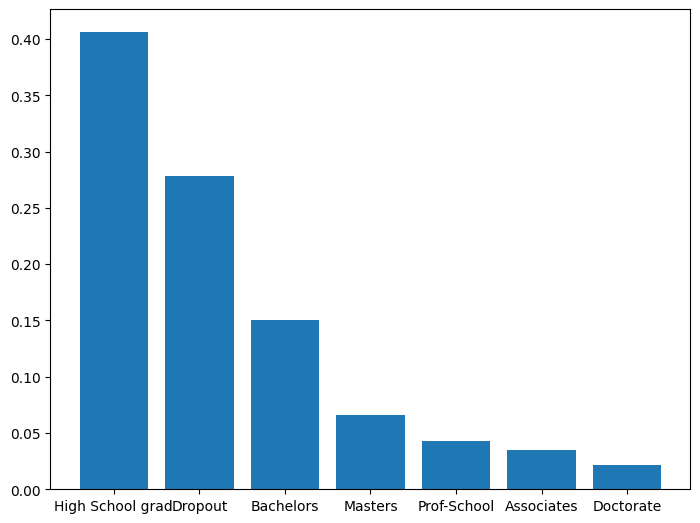

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(groups, counts)
plt.show()